In [61]:
# Google Colab
#load file from drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [62]:
#import library os
import os


In [ ]:
#Mendownload architektur my_ssd_mobilenet
#ssd mobilenet adalah salah satu arsitektur dari algoritma ssd mobile net
#memilih ssd_mobilnet karena pada saat implementasi view camera tidak hanya pada 
#plat nomor saja tetapi seluruh bagian kndaran agar hasil scan bisa mendeteksi plat
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:
#membuat folder
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [ ]:
#Membuat file
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
#memastikan sistem opeasi yang digunakan
print(os.name)

#os yang digunakan posix, maka akan dibuat direktori path
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

posix


# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
#mendowload objekdeteksi ditaruh di folder research 
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research')): #cek apakah direktori Tensorflow/models/research belum ada
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']} #jika belum maka download tensorflow model dan letakkan di folder Tensorflow/models

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 74625, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 74625 (delta 53), reused 96 (delta 50), pack-reused 74512
Receiving objects: 100% (74625/74625), 580.31 MiB | 32.50 MiB/s, done.
Resolving deltas: 100% (52923/52923), done.


In [ ]:
if os.name=='posix':  
    !apt-get install protobuf-compiler  # Install Protobuf--serialisasi data
    #Untuk mengInstall Tensorflow Object Detection menggunakan serialisai dari file yang .proto menjadi .py
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.3 MB 34.5 MB/s 
     |██████████████████████████████

In [ ]:
#Untuk verikasi libarary yang dibutukan dari instalasi sebelumnya
#memastikan instalasi berhasil menggunakan(file model_builder_tf2_test.py)
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-06-22 03:49:28.211506: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0622 03:49:28.492470 140232805091200 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.7s
I0622 03:49:28.914317 140232805091200 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.7s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.14s
I0622 03:49:30.053052 140232805091200 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_crea

In [ ]:
#import library object detection
import object_detection

In [ ]:
#download pretrained(Pre-trained model biasanya sudah dilatih pada dataset yang besar dan merupakan dataset benchmark, 
#sehingga kualitas pre-trained model harusnya sudah sangat baik.) model ssd mobile net
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL} #download ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']} #dipindah ke Tensorflow/workspace/pre-trained-models
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'} #diekstrak
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-06-22 03:50:29--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.2.112, 2607:f8b0:4004:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.2.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.09s   

2022-06-22 03:50:29 (214 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/c

# 2. Create Label Map

In [ ]:
#Membuat label sesuai dengan labeling
labels = [{'name':'platNomor', 'id':1}]

#menulis file label_map.pbtxt dengan isi sesuai dengan variabel labels
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Copy Model Config to Training Folder

In [ ]:
#Duplikat file pretrained model ke training folder
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 4. Update Config For Transfer Learning
Transfer Learning merupakan teknik yang memanfaatkan model yang sudah ditraining sebelumnya (pretrained model) untuk digunakan mengklasifikasikan dataset yang baru sehingga tidak perlu untuk melakukan training data dari awal

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
#konfigurasi pada pipeline training mendefinisikan model mana dan parameter
#apa yang akan digunakan untuk proses training. API deteksi objek tensorflow
#menggunakan berkas protobuf untuk mengkonfigurasi proses training dan evaluasi
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
#isi dari config
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [ ]:
#membaca pipeline config
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

proto_str

'model {\n  ssd {\n    num_classes: 90\n    image_resizer {\n      fixed_shape_resizer {\n        height: 320\n        width: 320\n      }\n    }\n    feature_extractor {\n      type: "ssd_mobilenet_v2_fpn_keras"\n      depth_multiplier: 1.0\n      min_depth: 16\n      conv_hyperparams {\n        regularizer {\n          l2_regularizer {\n            weight: 3.9999998989515007e-05\n          }\n        }\n        initializer {\n          random_normal_initializer {\n            mean: 0.0\n            stddev: 0.009999999776482582\n          }\n        }\n        activation: RELU_6\n        batch_norm {\n          decay: 0.996999979019165\n          scale: true\n          epsilon: 0.0010000000474974513\n        }\n      }\n      use_depthwise: true\n      override_base_feature_extractor_hyperparams: true\n      fpn {\n        min_level: 3\n        max_level: 7\n        additional_layer_depth: 128\n      }\n    }\n    box_coder {\n      faster_rcnn_box_coder {\n        y_scale: 10.0\n    

In [ ]:
#memberi nilai pada pipeline_config
pipeline_config.model.ssd.num_classes = len(labels) #panjang label = jumlah kelas
pipeline_config.train_config.batch_size = 4 #ukuran sampel yang diproses sebelum model di update 
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0') #lokasi path checkpoint
pipeline_config.train_config.fine_tune_checkpoint_type = "detection" #tipe cek poin detection
pipeline_config.train_input_reader.label_map_path= files['LABELMAP'] #lokasi path labelmap
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')] #lokasi file train.record
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP'] #lokasi path labelmap
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')] #lokasi file test.record

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text) #isi config text ditulis sesuai dg pipelineconfig

config_text

'model {\n  ssd {\n    num_classes: 1\n    image_resizer {\n      fixed_shape_resizer {\n        height: 320\n        width: 320\n      }\n    }\n    feature_extractor {\n      type: "ssd_mobilenet_v2_fpn_keras"\n      depth_multiplier: 1.0\n      min_depth: 16\n      conv_hyperparams {\n        regularizer {\n          l2_regularizer {\n            weight: 4e-05\n          }\n        }\n        initializer {\n          random_normal_initializer {\n            mean: 0.0\n            stddev: 0.01\n          }\n        }\n        activation: RELU_6\n        batch_norm {\n          decay: 0.997\n          scale: true\n          epsilon: 0.001\n        }\n      }\n      use_depthwise: true\n      override_base_feature_extractor_hyperparams: true\n      fpn {\n        min_level: 3\n        max_level: 7\n        additional_layer_depth: 128\n      }\n    }\n    box_coder {\n      faster_rcnn_box_coder {\n        y_scale: 10.0\n        x_scale: 10.0\n        height_scale: 5.0\n        width_sc

In [ ]:
#open cv yang sudah terinstal tisak support versnya, kemudian innstal kembali versi 
#yang opencv-python-headless==4.1.2.30
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 6.6 MB/s 


In [ ]:
#mengkopi file train.record ke tf/workspace/anotasi 
!cp '/content/gdrive/MyDrive/KULIAH DESTY/SMT 4/PROJEK AI-SISTEM PARKIR/20090134-DESTY NURUL ANITSA-4C/train.record' 'Tensorflow/workspace/annotations/train.record'

In [ ]:
#mengkopi file test.record ke tf/workspace/anotasi 
!cp '/content/gdrive/MyDrive/KULIAH DESTY/SMT 4/PROJEK AI-SISTEM PARKIR/20090134-DESTY NURUL ANITSA-4C/test.record' 'Tensorflow/workspace/annotations/test.record'

# 6. Train the model

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


In [ ]:
!{command}

2022-05-31 23:50:23.352307: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0531 23:50:23.358625 139922475100032 cross_device_ops.py:1386] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0531 23:50:23.363885 139922475100032 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0531 23:50:23.368868 139922475100032 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0531 23:50:23.369093 139922475100032 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0531 23:50:23.553449 139922475100032 deprecation.py:356] From /usr/loca

Pada saat proses training, sistem manghasilkan chekpoint(file ckpt) yang dibuat otomatis oleh tf. 

In [ ]:
#mengopi data yang sudah ditraining ke collab 
!cp '/content/gdrive/MyDrive/KULIAH DESTY/SMT 4/PROJEK AI-SISTEM PARKIR/20090134-DESTY NURUL ANITSA-4C/models.tar.gz' './'

In [ ]:
#megkstrak model training data
!tar -xvf models.tar.gz -C ./ 


Tensorflow/workspace/models/my_ssd_mobnet/
Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport/
Tensorflow/workspace/models/my_ssd_mobnet/eval/
Tensorflow/workspace/models/my_ssd_mobnet/eval/events.out.tfevents.1654062553.d6d9f8d30a70.1810.0.v2
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-7.index
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-11.index
Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/
Tensorflow/workspace/models/my_ssd_mobnet/export/
Tensorflow/workspace/models/my_ssd_mobnet/checkpoint
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-9.index
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-5.data-00000-of-00001
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-8.index
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-8.data-00000-of-00001
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-11.data-00000-of-00001
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-10.index
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-6.index
Tensorflow/workspace/models/my_ssd_mobnet/pipeline.conf

# 7. Evaluate the Model

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [ ]:
!{command}

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.7/dist-packages/keras/api/__init__.py", line 8, in <module>
    from keras.api import keras
  File "/usr/local/lib/python3.7/dist-packages/keras/api/keras/__init__.py", line 21, in <module>
    from keras.api.keras import experimental
  File "/usr/local/lib/python3.7/dist-packages/keras/api/keras/experimental/__init__.py", line 13, in <module>
    from keras.saving.saved_model_experimental import export_saved_model
  File "/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model_experimental.py", line 24, in <module>
    from keras.saving import utils_v1 as model_utils
  File "/usr/local/lib/python3.7/dist-packages/keras/saving/utils_v1/__init__.py", line 22, in <module>
    from keras.saving.util

# 8. Load Train Model From Checkpoint

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

configs['model']

ssd {
  num_classes: 1
  image_resizer {
    fixed_shape_resizer {
      height: 320
      width: 320
    }
  }
  feature_extractor {
    type: "ssd_mobilenet_v2_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 3.9999998989515007e-05
        }
      }
      initializer {
        random_normal_initializer {
          mean: 0.0
          stddev: 0.009999999776482582
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    use_depthwise: true
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
      additional_layer_depth: 128
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_threshold: 0.5
  

#TESTING

#9. Detect from an Image

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
print(category_index)

{1: {'id': 1, 'name': 'platNomor'}}


In [ ]:
IMAGE_PATH = '/content/gdrive/MyDrive/KULIAH DESTY/SMT 4/PROJEK AI-SISTEM PARKIR/20090134-DESTY NURUL ANITSA-4C/Image/20220530_160602.jpg'

In [ ]:
IMAGE_PATH

'/content/gdrive/MyDrive/KULIAH DESTY/SMT 4/PROJEK AI-SISTEM PARKIR/20090134-DESTY NURUL ANITSA-4C/Image/20220530_160602.jpg'

In [ ]:
img = cv2.imread(IMAGE_PATH) #cv2 untuk membaca gambar
image_np = np.array(img) #gambar yang digunakan untuk deteksi diubah menjadi aray

#mengubah array ke bentuk tensor dengan tipe data berupa float32
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32) 
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()
count = 0
for box,score,cls in zip(detections['detection_boxes'],detections['detection_scores'],detections['detection_classes']):
    if score >= 0.3 and score <= 1.0:
        count += 1

count
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.0,
            agnostic_mode=False,
            line_thickness=4,
            groundtruth_box_visualization_color='black',
            skip_scores=False,
            skip_labels=False,
            skip_track_ids=False)

# plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
# plt.show()


array([[[ 55,   0,  39],
        [ 53,   0,  38],
        [ 48,   0,  34],
        ...,
        [255, 255, 241],
        [255, 255, 244],
        [255, 255, 241]],

       [[255, 230, 255],
        [255, 233, 255],
        [255, 230, 255],
        ...,
        [255, 255, 244],
        [255, 255, 244],
        [255, 255, 241]],

       [[255, 250, 250],
        [255, 251, 252],
        [255, 251, 254],
        ...,
        [255, 255, 244],
        [255, 255, 244],
        [255, 255, 243]],

       ...,

       [[135, 121, 125],
        [135, 121, 125],
        [135, 121, 125],
        ...,
        [ 60,  80,  81],
        [ 31,  87,  82],
        [ 13,  88,  80]],

       [[132, 121, 124],
        [132, 121, 124],
        [132, 121, 124],
        ...,
        [ 29,  85,  80],
        [  0, 101,  80],
        [  0, 107,  78]],

       [[131, 120, 123],
        [132, 121, 124],
        [132, 121, 124],
        ...,
        [  9,  82,  74],
        [  0, 106,  77],
        [  0, 117,  77]]

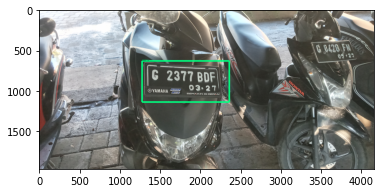

In [59]:
img = cv2.imread(IMAGE_PATH) #cv2 untuk membaca gambar
image_np = np.array(img) #gambar yang digunakan untuk deteksi diubah menjadi aray

#mengubah array ke bentuk tensor dengan tipe data berupa float32
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32) 
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()
count = 0
for box,score,cls in zip(detections['detection_boxes'],detections['detection_scores'],detections['detection_classes']):
    if score >= 0.5 and score <= 1.0:
        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False,
            line_thickness=20, #ketebalan box 20
            groundtruth_box_visualization_color='black',
            skip_scores=False,
            skip_labels=False,
            skip_track_ids=False)



plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

#OCR

In [ ]:
!pip install easyocr
#instal ocr(buah perangkat lunak yang mengubah teks dalam format berkas citra atau
# gambar ke dalam format teks yang bisa dibaca dan disunting oleh aplikasi komputer)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 16 kB/s 


In [ ]:
import easyocr

In [ ]:
detection_threshold = 0.5 #minimal deteksi yang akan di ambil gambarnya

In [ ]:
image = image_np_with_detections
norm_img = np.zeros((image.shape[0], image.shape[1]))
image = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)[1]
image = cv2.GaussianBlur(image, (1, 1), 0)
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

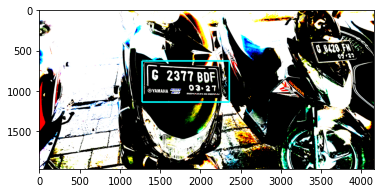

In [ ]:
boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
#tinggi dan lebar x dan y pada gambar
width = image.shape[1]
height = image.shape[0]

In [ ]:
#Penerapan Filter Recognition Optic Image untuk mengambil text dari gambar
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['id']) #id bahasa indonesia / dibaca dalam teks bahasa indonesia
    ocr_result = reader.readtext(region)
    print(ocr_result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.32034332 0.30763033 0.578363   0.5682429 ]
[ 630.4356451  1279.74217415 1138.21838665 2363.8904953 ]
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[122, 104], [218, 104], [218, 240], [122, 240]], '6', 0.6553143412334208), ([[284, 95], [932, 95], [932, 287], [284, 287]], '2377 BDF', 0.8525680151804392), ([[392, 360], [434, 360], [434, 368], [392, 368]], '{). 7', 0.021942027572469977), ([[393, 345], [461, 345], [461, 361], [393, 361]], 'Ll', 0.3570715347814904), ([[581, 288], [934, 288], [934, 391], [581, 391]], '09, 2 7', 0.25982429973783316), ([[123, 339], [332, 339], [332, 404], [123, 404]], 'YAMAHA', 0.9995996473380582), ([[550, 387], [967, 387], [967, 430], [550, 430]], 'SEMAKIN Di DEPAN', 0.432639455114572)]


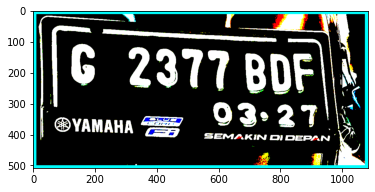

In [ ]:
deteksi = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)
plt.imshow(deteksi)

In [ ]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

136
6
192
2377 BDF
8
{). 7
16
Ll
103
09, 2 7
65
YAMAHA
43
SEMAKIN Di DEPAN


#Filtering OCR

In [ ]:
region_threshold = 0.02 #ketebalan huruf

In [ ]:
# membuat function print plate hasil deteksi
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [ ]:
arr = filter_text(region, ocr_result, region_threshold) #hasil dari fungsi flter teks adalah berupa array
plat = ' '.join(arr) #menggabungkan array dengan pemisah spasi
plat[0:10] #mencetak string pada plat mulai dari index ke 0 sampai index ke 10

'6 2377 BDF'

#13. Zip and Export Models

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']} #membuat file tar.gz dari hasil checkpoint

In [ ]:
!cp models.tar.gz '/content/gdrive/MyDrive/KULIAH DESTY/SMT 4/PROJEK AI-SISTEM PARKIR/FIX/' #salin models.tar.gz ke folder drive